# Film Analysis
This is a project for the IUM course of the computer science degree course.  
This project wants to analyze some data like the actors, the languages, the crew exc. of different films. 
## First steps
In the beginning we check the type of the data of the dataframes used for the analysis, later we will clean the data so that we can start the analysis of the data in order to find some correlation between the data or to debunking beliefs  
Possibili analisi: mi aspetto che i film con candidazioni all'oscar abbiano un rating più alto. I film prodotti in america ed europa hanno un rating più alto. Qual è il tipo di film con rating più alto, quindi quello che piace di più. In che lingua sono i film con rating più alti (mi aspetto l'inglese su tutti). Quali sono i generi con rating più alto. In che paese vengono prodotti più film di genere drammatico (USA, cina, india, giappone). Quale studio produce più film e che rating hanno i film prodotti. Raggruppando i film ogni decina di anni, quali sono stati i generi più amati in ogni decade

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from jupyterlab.semver import valid
from pandas import pivot_table

In [2]:
actors = pd.read_csv('data/actors.csv')
countries = pd.read_csv('data/countries.csv')
crew = pd.read_csv('data/crew.csv')
genres = pd.read_csv('data/genres.csv')
languages = pd.read_csv('data/languages.csv')
movies = pd.read_csv('data/movies.csv') #contiene anche film che devono ancora uscire e che quindi non hanno ancora un rating
posters = pd.read_csv('data/posters.csv') # inutile perché contiene solo i link di posters dei film 
releases = pd.read_csv('data/releases.csv')
rotten_tomatoes = pd.read_csv('data/rotten_tomatoes_reviews.csv')
studios = pd.read_csv('data/studios.csv')
oscars = pd.read_csv('data/the_oscar_awards.csv')
themes = pd.read_csv('data/themes.csv') # contiene solo la "trama" del film

In [3]:
actors['name'] = actors['name'].astype('string')
actors['role'] = actors['role'].astype('string')
countries['country'] = countries['country'].astype('string')
crew['name'] = crew['name'].astype('string')
crew['role'] = crew['role'].astype('string')
genres['genre'] = genres['genre'].astype('string')
languages['language'] = languages['language'].astype('string')
languages['type'] = languages['type'].astype('string')
movies['name'] = movies['name'].astype('string')
releases['country'] = releases['country'].astype('string')
releases['type'] = releases['type'].astype('string')
releases['date'] = pd.to_datetime(releases['date'], format='%Y-%m-%d')
studios['studio'] = studios['studio'].astype('string')
oscars['category'] = oscars['category'].astype('string')
oscars['name'] = oscars['name'].astype('string')
oscars['film'] = oscars['film'].astype('string')
oscars['winner'] = oscars['winner'].astype(bool)
themes['theme'] = themes['theme'].astype('string')

In [99]:
crew.head(10)

,id,role,name
0,1000001,Director,Greta Gerwig
1,1000001,Producer,Tom Ackerley
2,1000001,Producer,Margot Robbie
3,1000001,Producer,Robbie Brenner
4,1000001,Producer,David Heyman
5,1000001,Producer,Christine Crais
6,1000001,Writer,Noah Baumbach
7,1000001,Writer,Greta Gerwig
8,1000001,Casting,Lucy Bevan
9,1000001,Casting,Allison Jones


In [5]:
dataframes = {'df1': actors, 'df2': countries, 'df3': crew, 'df4': genres, 'df5': languages, 'df6': movies,
              'df7': releases, 'df8': studios, 'df9': oscars, 'df10': rotten_tomatoes, 'df11': themes}

for name, df in dataframes.items():
    print(f"{name} columns:")
    print(list(df.columns))
    print()

df1 columns:
['id', 'name', 'role']

df2 columns:
['id', 'country']

df3 columns:
['id', 'role', 'name']

df4 columns:
['id', 'genre']

df5 columns:
['id', 'type', 'language']

df6 columns:
['id', 'name', 'date', 'tagline', 'description', 'minute', 'rating']

df7 columns:
['id', 'country', 'date', 'type', 'rating']

df8 columns:
['id', 'studio']

df9 columns:
['year_film', 'year_ceremony', 'ceremony', 'category', 'name', 'film', 'winner']

df10 columns:
['rotten_tomatoes_link', 'movie_title', 'critic_name', 'top_critic', 'publisher_name', 'review_type', 'review_score', 'review_date', 'review_content']

df11 columns:
['id', 'theme']



# Highest Rating Films per Country
This analysis aims to visualize the average rating of films produced by countries with at least 1,500 films.  
Since the United States produces the most films overall and is the most renowned for its film production, it is expected to have the highest average rating.  
The majority of award-winning films are produced in America, so it's natural to assume that the average rating for these films would also be higher than elsewhere.  
However, this isn't the case; among all the countries that have produced at least 1,500 films, the one with the highest average rating is Japan, followed by France and England (America isn't even on the podium). This holds true even if we raise the minimum threshold of films to 5,000, America remains outside the top three.  
The number of films produced by every nation is shown by the piechart where the countries wth less than 850 films are grouped in the label "Others"

In [6]:
country_films = pd.merge(movies, countries, left_on='id', right_on='id', how='left')

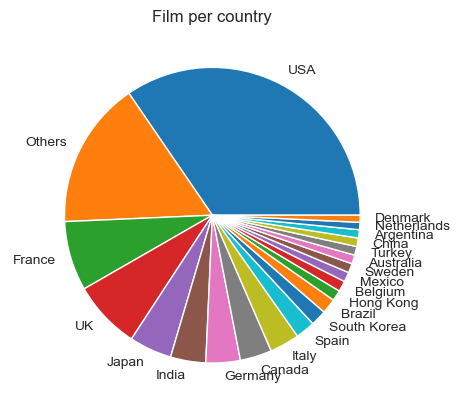

In [7]:
country_films = country_films[~country_films['rating'].isna()]
counts_of_films = country_films['country'].value_counts()
valid_countries = counts_of_films[counts_of_films >= 850].index

country_films['country_grouped'] = country_films['country'].where(
    country_films['country'].isin(valid_countries),
    other='Others'
)

counts = country_films['country_grouped'].value_counts()
counts.plot(kind='pie')
plt.title('Film per country')
plt.ylabel(' ')
plt.show()

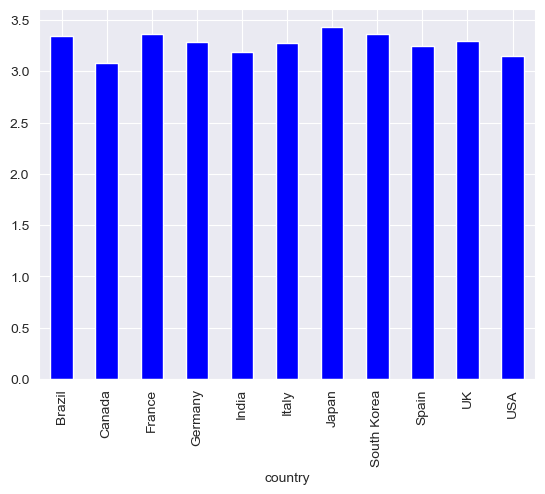

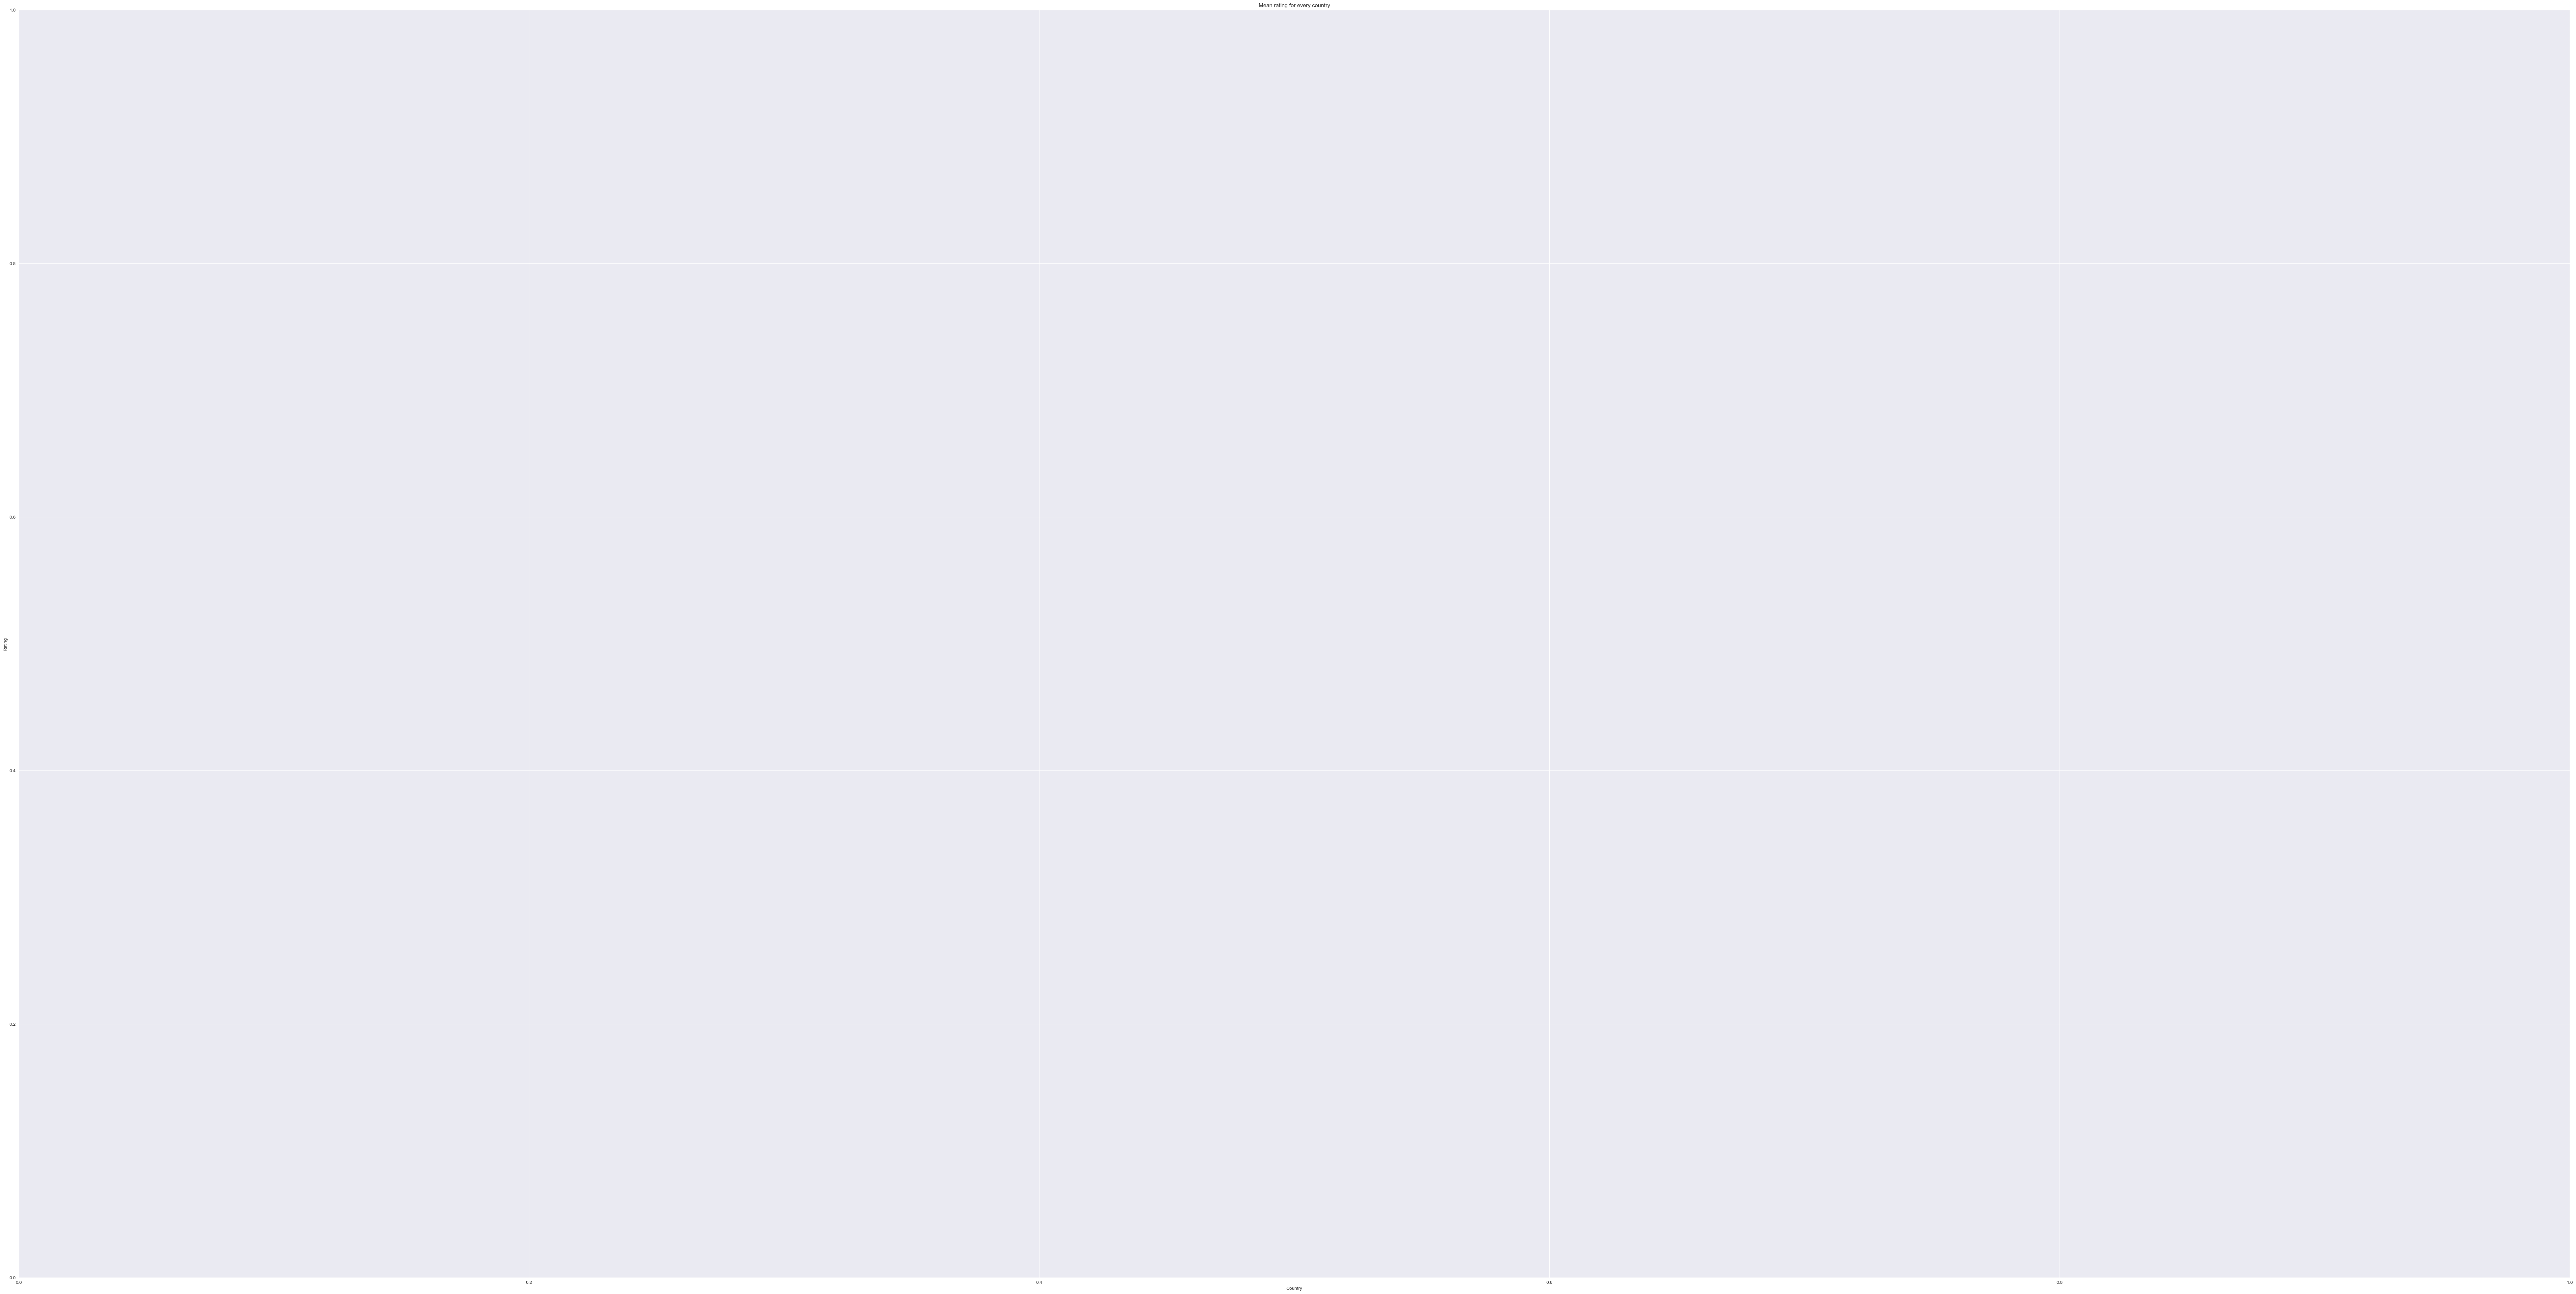

In [8]:
country_with1500_films = counts_of_films[counts_of_films > 1500].index
country_top1500 = country_films[country_films['country'].isin(country_with1500_films)]
avg_rating_by_country = country_top1500.groupby('country')['rating'].mean()
avg_rating_by_country = avg_rating_by_country[avg_rating_by_country > 2.5]
avg_rating_by_country.plot(kind='bar', color='blue')
plt.xticks(rotation=90)
plt.figure(figsize=(100, 50))
plt.title('Mean rating for every country')
plt.xlabel('Country')
plt.ylabel('Rating')
plt.show()

# TrendLine of the production of films by year
For this analysis, we only consider films produced up to 2023 because in the "movie" dataset, some films produced in 2024 have a rating while others do not.  
This suggests that some films have not yet been released and will not be included in the analysis because it is uncertain whether they will be produced, just as the release year is uncertain; many films are often postponed  
As we can expect the production of the films from 1874 has exponentially increased thanks to some innovations in the cinematography world, for example, in 1996, high definition was introduced, an international agreement on resolution and format standards.  
Another innovation occurred in 1999 when the first non-experimental film was released with large portions shot with high-definition cameras. Computer editing also made film production faster

In [9]:
films_by_year = pd.merge(movies, countries, on='id', how='left')
# eliminate the duplicated films with same release year
films_by_year.drop_duplicates(subset=['id', 'date'] ,inplace=True)
films_by_year = films_by_year[films_by_year['date'] < 2024]
films_by_year['date'].describe()

count    830290.000000
mean       1997.926545
std          27.574031
min        1874.000000
25%        1985.000000
50%        2009.000000
75%        2018.000000
max        2023.000000
Name: date, dtype: float64

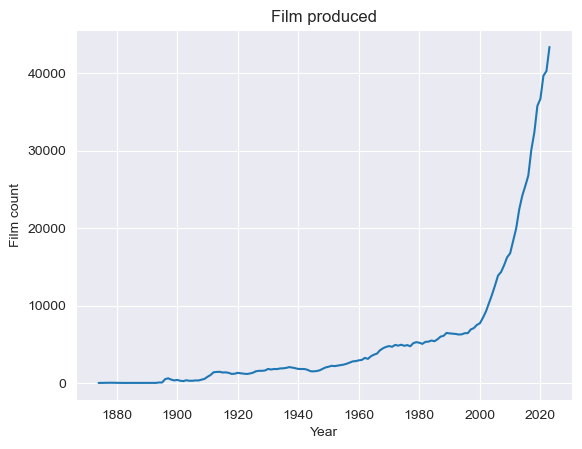

In [10]:
trend = films_by_year.groupby('date').size().reset_index(name = 'film_count')
# build the trendLine
sns.lineplot(data=trend, x='date', y='film_count')
plt.title('Film produced')
plt.xlabel('Year')
plt.ylabel('Film count')
plt.grid(True)
plt.show()

In [11]:
#~

# Rating VS Film Length
This analysis aimed to identify a possible correlation between film length and ratings.  
By observing the various values for each film's running time, I realized that the dataset includes not only films but also TV series, looking more carefully, thanks to the visualization of distribution of the movies that weren't series, i noticed that there also were short films. This led me to first divide the three types of movies into three categories, based on their running time, typically between 60 and 240 minutes.  
After this, I initially attempted to visualize a possible correlation between the three categories and their running time on the same chart, but this did not yield any conclusions. I subsequently attempted to visualize the possible correlations for each category individually, but again without success.  
We can therefore say that the running time of films, short films, and TV series does not impact the final rating.

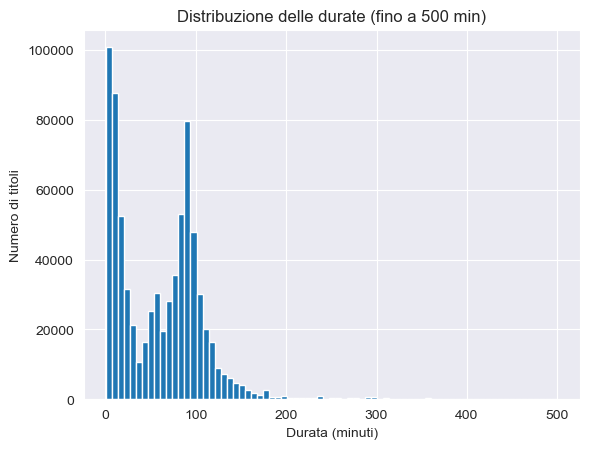

In [12]:
movies_filtered = movies[movies['minute'] <= 500]
movies_filtered = movies_filtered[movies_filtered['minute'].notna()]
plt.hist(movies_filtered['minute'], bins=75)
plt.xlabel('Durata (minuti)')
plt.ylabel('Numero di titoli')
plt.title('Distribuzione delle durate (fino a 500 min)')
plt.show()

In [13]:
from utils.functions import classifica_durata
movies_with_types = movies
movies_with_types['type_of_movie'] = movies_with_types.apply(classifica_durata, axis=1)

In [14]:
movies_with_types = movies_with_types[(movies_with_types['rating'].notna()) & (movies['minute'].notna())]

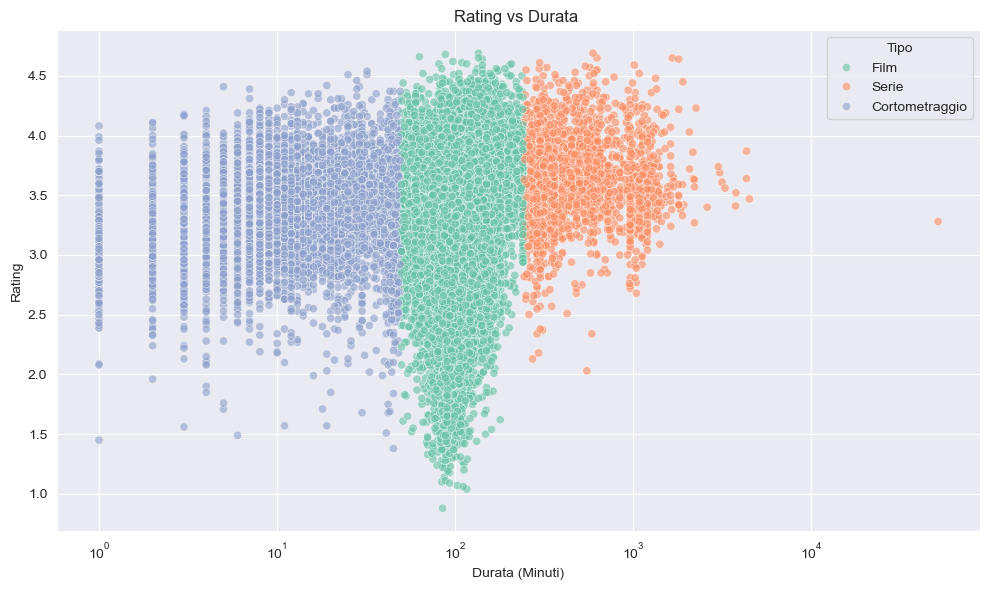

In [15]:
plt.figure(figsize=(10, 6))
sns.scatterplot(
    data=movies_with_types,
    x='minute',
    y='rating',
    hue='type_of_movie',
    palette='Set2',
    alpha=0.6
)
plt.xscale('log')  # Scala logaritmica
plt.title('Rating vs Durata ')
plt.xlabel('Durata (Minuti)')
plt.ylabel('Rating')
plt.legend(title='Tipo')
plt.tight_layout()
plt.show()

In [16]:
films = movies[movies['type_of_movie'] == 'Film']
series = movies[movies['type_of_movie'] == 'Serie']
corto = movies[movies['type_of_movie'] == 'Cortometraggio']

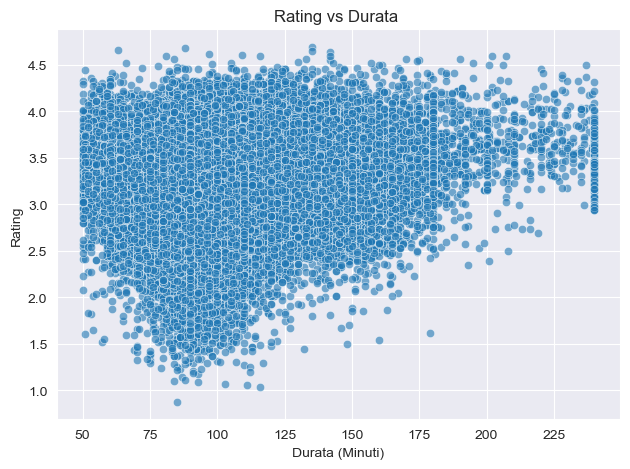

In [17]:
sns.scatterplot(
    data=films,
    x='minute',
    y='rating',
    alpha=0.6
)
plt.title('Rating vs Durata ')
plt.xlabel('Durata (Minuti)')
plt.ylabel('Rating')
plt.tight_layout()
plt.show()

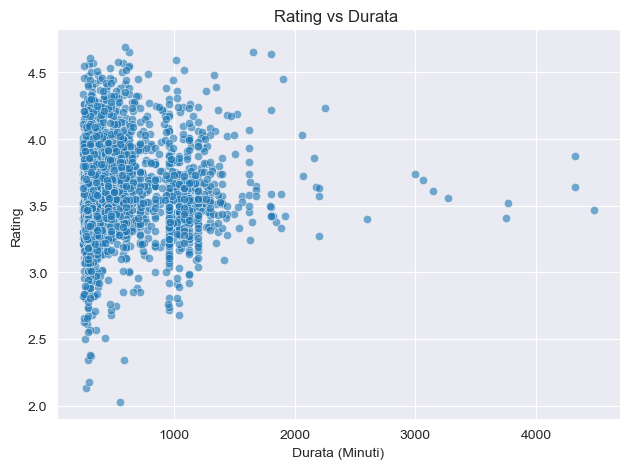

In [18]:
series = series[series['minute']<20000]
sns.scatterplot(
    data=series,
    x='minute',
    y='rating',
    alpha=0.6
)
plt.title('Rating vs Durata ')
plt.xlabel('Durata (Minuti)')
plt.ylabel('Rating')
plt.tight_layout()
plt.show()

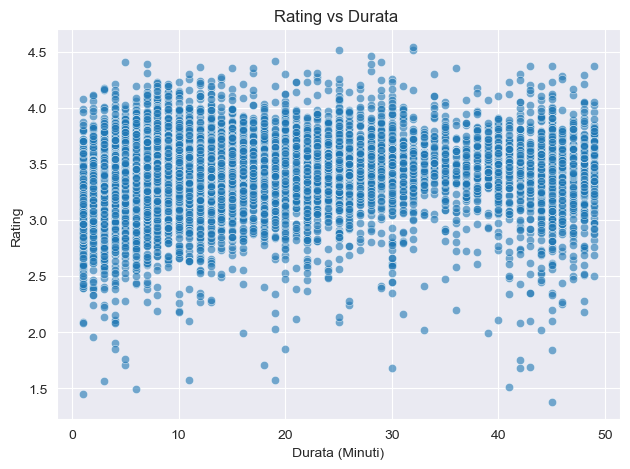

In [19]:
sns.scatterplot(
    data=corto,
    x='minute',
    y='rating',
    alpha=0.6
)
plt.title('Rating vs Durata ')
plt.xlabel('Durata (Minuti)')
plt.ylabel('Rating')
plt.tight_layout()
plt.show()

# Oscar-nominated Films
It's common to think that films with nominations at the oscars have a far higher rating than the others. Well, that's not completely true.  
You're right if you think that the average ratings for the films with at least one nomination is higher than the other ones but the difference between them is very subtle.  
This analysis shows that, after having separated the three types of movies (nominated, not nominated and winners) and calculated the mean's rating for every category, remember that we have previously said that in the movies dataset there are film, short film and series, the chart shows us that yes, there's a difference between the rating of the movies nominated at the oscars, not nominated and the winners one, but the differences is very small.  
This could mean either that the selection of Oscar-nominated films is very difficult because they are all considered valid or it is very difficult because there are not many films that excel above others.

In [28]:
from utils.functions import status_oscars

movies_2 = movies
oscars.loc[oscars['film'].notna(), 'nominated'] = True
oscars['nominated'] = oscars['nominated'].astype(bool)
oscars['film'] = oscars['film'].str.lower()
oscars_2 = oscars.dropna(subset=['film']) 
# Delete Nan in the film column 
movies_2['name'] = movies_2['name'].str.lower()

# Drop duplicates where there are different nominations for the same film
nominations = oscars_2.drop_duplicates(subset=['year_film', 'film'])
# Rename column for the merge
movies_2 = movies_2.rename(columns={'name': 'film_name'})
oscar_films = pd.merge(movies_2, nominations, left_on=['film_name', 'date'], right_on=['film', 'year_film'], how='left')
oscar_films['nominated'] = np.where(oscar_films['nominated'].isna(), False, True)
oscar_films['oscar_status'] = oscar_films.apply(status_oscars, axis=1)

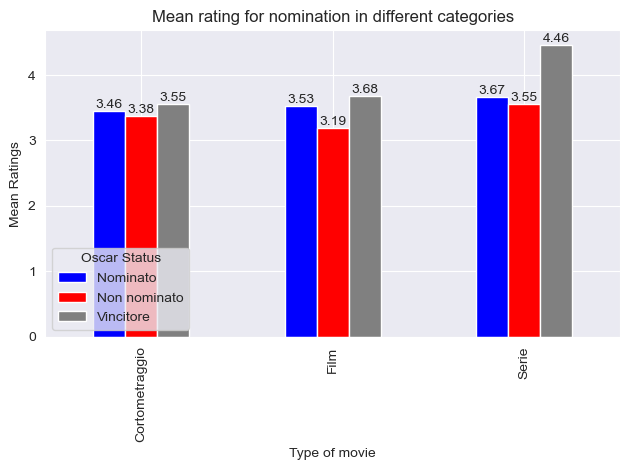

In [31]:
rating_by_nominations = oscar_films.groupby(['type_of_movie' ,'oscar_status'])['rating'].mean().unstack()

ax = rating_by_nominations.plot(kind='bar', color=['blue', 'red', 'gray'])
plt.title('Mean rating for nomination in different categories')
plt.ylabel('Mean Ratings')
plt.xlabel('Type of movie')
plt.legend(title='Oscar Status')
for container in ax.containers:
    ax.bar_label(container, fmt='%.2f')
plt.tight_layout()
plt.show()

# Directors & Genres

In [132]:
# movies, crew, genres
# crew ha un Nan sul nome, movies voglio solo quelli con rating non Nan e con data prima del 2024
# voglio creare una heatmap che incroci i registi, i generi e i rating
valid_movies = movies[(movies['rating'].notna()) & (movies['date'] < 2024)]
valid_crew = crew[(crew['name'].notna()) & (crew['role'] == 'Director')]
director_movies = pd.merge(movies, valid_crew, on='id', how='inner')
genre_movies = pd.merge(director_movies, genres, on='id', how='inner')
genre_movies.rename(columns={'name_y': 'cast_name'}, inplace=True)
genre_movies.rename(columns={'name_x': 'film_name'}, inplace=True)

In [146]:
g_m_view = genre_movies[['id', 'film_name', 'rating', 'type_of_movie', 'cast_name', 'genre']]
valid_director = g_m_view['cast_name'].value_counts()
top10_director_movies = valid_director.head(10).index
top10_director_movies = g_m_view[g_m_view['cast_name'].isin(top10_director_movies)]